In [89]:
import pandas as pd

# read excel file
df = pd.read_excel('OpenVaccinexlsx.xlsx').dropna().reset_index(drop=True)

df=df.iloc[[0,1,6]]
df

,models,Private Score,Public Score
0,RNAdegformer,0.33722,0.22914
1,RibonanzaNet-Deg,0.33105,0.22941
6,Our stage3-semi-pseudo-noisy&test&training **,0.32998,0.22835


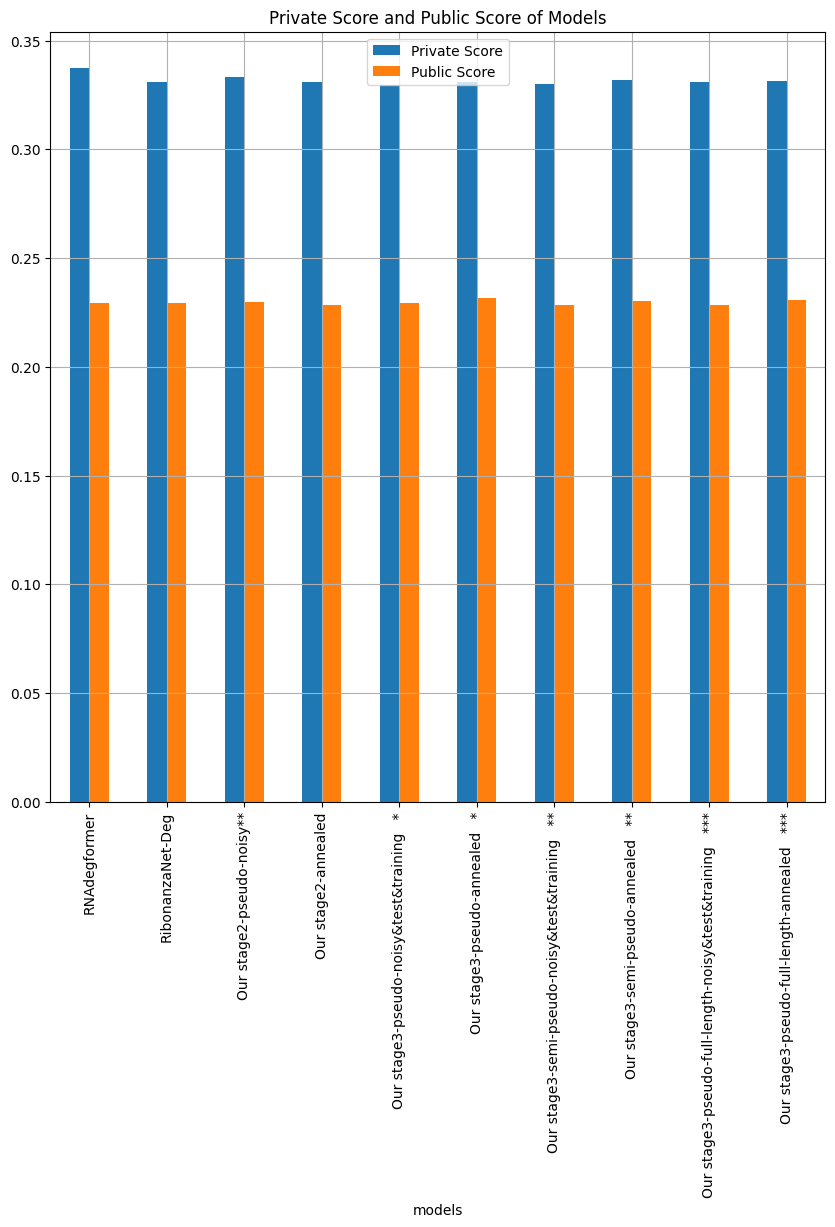

In [102]:
# bar plot
df = pd.read_excel('OpenVaccinexlsx.xlsx').dropna().reset_index(drop=True)

# two bar group Private Score	Public Score
# x axis is the name of the models

df.plot(kind='bar', x='models', y=['Private Score', 'Public Score'], figsize=(10, 10), title='Private Score and Public Score of Models', grid=True)
plt.show()



In [35]:
# read csv file

df_public = pd.read_csv('stanford-covid-vaccine-publicleaderboard.csv').dropna().reset_index(drop=True)
df_public[['models', 'Public Score']] = df_public[['TeamName', 'Score']]
print(len(df_public))

df_private = pd.read_csv('stanford-covid-vaccine-privateleaderboard.csv').dropna().reset_index(drop=True)
df_private[['models', 'Private Score']] = df_private[['TeamName', 'Score']]
print(len(df_private))

# 选择需要的列
df_public_selected = df_public[['models', 'Public Score']]
df_private_selected = df_private[['models', 'Private Score']]

# 使用merge合并DataFrame
df_board = df_public_selected.merge(df_private_selected, on='models', how='inner')

# 重置索引并丢弃NaN值（如果有的话）
df_board = df_board.dropna().drop_duplicates("models").reset_index(drop=True)

# 显示结果
df_board

1636
1636


,models,Public Score,Private Score
0,Kazuki ** 2,0.22756,0.34266
1,FromTheWheel & Dyed & StoneShop,0.22758,0.34385
2,Jiayang Gao,0.22815,0.34198
3,Striderl,0.22848,0.34327
4,Patrick Yam,0.22883,0.34875
...,...,...,...
1604,Anish Mukherjee,0.64846,0.71003
1605,Rajeswaran V,0.64846,0.71003
1606,Dr Figz,0.64846,0.71003
1607,hoxosh,0.64846,0.71003


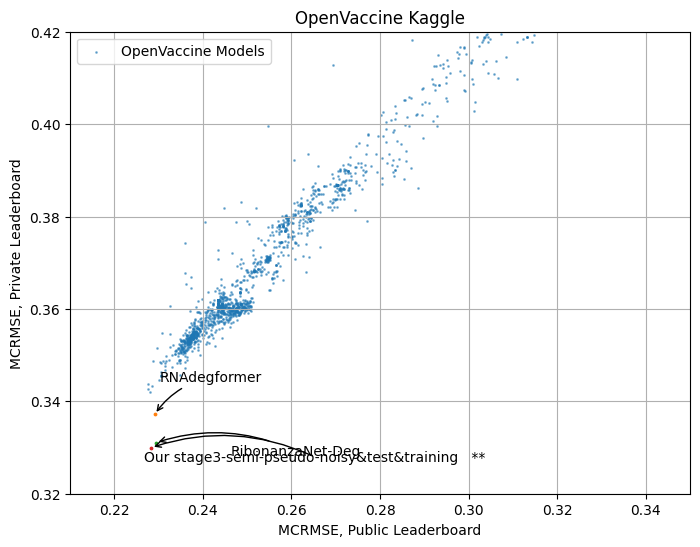

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text  # 导入adjust_text函数

# Example data similar to the one in your image
public_leaderboard = df_board['Public Score'].values
private_leaderboard = df_board['Private Score'].values

# Highlight specific points
# use df to get the highlighted points
highlighted_points = {
    row['models']: (row['Public Score'], row['Private Score'])
    for _, row in df.iterrows()
}

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(public_leaderboard, private_leaderboard, s=1, alpha=0.5, label='OpenVaccine Models')
texts = []

for i, (label, (x, y)) in enumerate(highlighted_points.items()):
    plt.scatter(x, y, s=3)  # 绘制散点
    
    # 使用plt.annotate创建文本注释，并使用xytext参数指定文本位置
    text = plt.annotate(
        text=label,
        xy=(x, y),
        xytext=(10, 10),
        textcoords='offset points',
        ha='right', 
        va='bottom',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")
    )
    texts.append(text)  # 将文本对象添加到列表中

# 使用adjust_text调整文本位置，减少重叠
adjust_text(texts)

# Add labels and title
plt.xlabel('MCRMSE, Public Leaderboard')
plt.ylabel('MCRMSE, Private Leaderboard')
plt.title('OpenVaccine Kaggle')
plt.legend()

# 设置坐标轴范围
plt.xlim(0.21, 0.35)
plt.ylim(0.32, 0.42)
# Add grid
plt.grid(True)

# Show plot
plt.show()

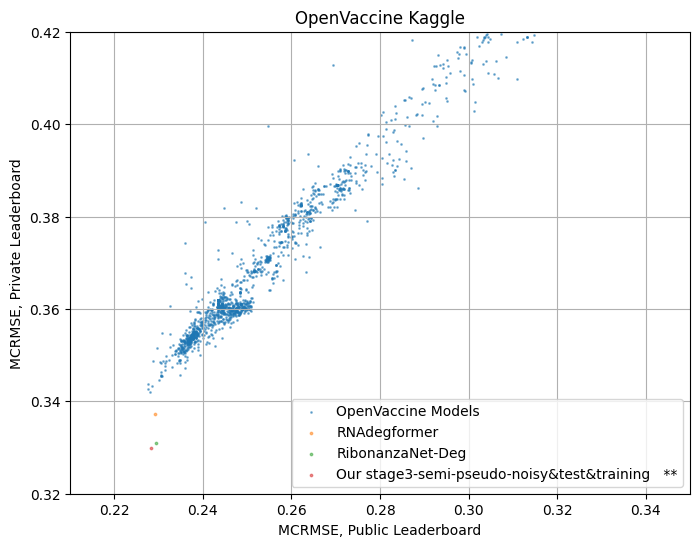

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Example data similar to the one in your image
public_leaderboard = df_board['Public Score'].values
private_leaderboard = df_board['Private Score'].values

# Highlight specific points
# use df to get the highlighted points
highlighted_points = {
    row['models']: (row['Public Score'], row['Private Score'])
    for _, row in df.iterrows()
}

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(public_leaderboard, private_leaderboard, s=1, alpha=0.5, label='OpenVaccine Models')
for label, (x, y) in highlighted_points.items():
    plt.scatter(x, y, s=3, label=label, alpha=0.5)

# Add labels and title
plt.xlabel('MCRMSE, Public Leaderboard')
plt.ylabel('MCRMSE, Private Leaderboard')
plt.title('OpenVaccine Kaggle')
plt.legend()

# 设置坐标轴范围
plt.xlim(0.21, 0.35)
plt.ylim(0.32, 0.42)
# Add grid
plt.grid(True)

# Show plot
plt.show()
